# 1. Reading From Dataset
First and foremost, we need a dataset to train our model. We can easily read the dataset thanks to [Hossein Zaredar](https://github.com/HosseinZaredar/Computational-Intelligence/blob/main/read_MNIST.py)'s help

In [1]:
import numpy as np
import matplotlib.pyplot as plt

NUMBER_OF_PIXELS = 784

To read from the files, we construct a function named `read_from_file` that does nothing but that.We know where to look for each data based on the information given by MNIST

In [2]:
def read_from_file(image_address, label_address):
    images_file = open(image_address, 'rb')
    images_file.seek(4)  # Positions the cursor to the 4th byte.
    number_of_images = int.from_bytes(images_file.read(4), 'big')  # reads 4 bytes in big endian order
    images_file.seek(16)  # Positions the cursor to the 16th byte.
    
    labels_file = open(label_address, 'rb')
    labels_file.seek(8)
    
    result_set = []
    for n in range(number_of_images):
        image = np.zeros((NUMBER_OF_PIXELS, 1))
        for i in range(NUMBER_OF_PIXELS):
            image[i, 0] = int.from_bytes(images_file.read(1), 'big') / 255

        label_value = int.from_bytes(labels_file.read(1), 'big')
        label = np.zeros((10, 1))  # Since we have 10 numbers from 0 to 9
        label[label_value, 0] = 1

        result_set.append((image, label))
    
    return result_set

then we call that function to create our train & test set

In [3]:
train_set = read_from_file("digit_images/train-images.idx3-ubyte", "digit_images/train-labels.idx1-ubyte")
test_set = read_from_file("digit_images/t10k-images.idx3-ubyte", "digit_images/t10k-labels.idx1-ubyte")

At the end of this section, we plot an image just to make sure we've done this part rightly.

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

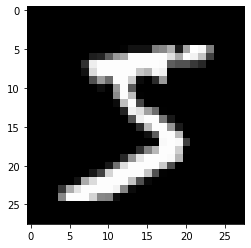

In [4]:
plt.imshow(train_set[0][0].reshape(28, -1), 'gray')
train_set[0][1]